<center>
    <h1 style="font-size: 36px; font-weight: bold;">💼 Predicting Monthly Income of Employees Based on Various Factors</h1>
</center>

### Business Problem:

Problem Statement  
Organizations are constantly seeking ways to optimize compensation packages for their employees. One crucial aspect is understanding how different factors such as education level, years of experience, performance score, and department impact monthly income. By leveraging regression models, we can predict the monthly income of employees based on these factors.

Using regression allows businesses to model the relationship between independent variables (e.g., education, experience, city, etc.) and the dependent variable (monthly income), providing a deeper understanding of how different factors influence employee pay.

Why Regression?

- Regression models are ideal for this problem because they help predict continuous numerical outcomes (monthly income) based on multiple input features.
- By applying a linear regression or more complex techniques like Ridge or Lasso regression, companies can predict a precise numerical value (monthly income) for employees based on various influencing factors.
- Regression techniques enable businesses to quantify relationships and gain actionable insights to make informed, data-driven decisions regarding employee compensation.

### Business Objectives:

1. Salary Prediction  
   By applying regression analysis, companies can predict monthly income for each employee based on their characteristics such as age, experience, education level, department, and location. This prediction can help HR departments adjust compensation packages to remain competitive and fair.

2. Identifying Pay Gaps  
   Regression models can uncover salary disparities among employees with similar profiles. For example, employees with the same experience level but different performance scores might have different income levels. Identifying such gaps allows organizations to ensure fair pay and take action to mitigate wage inequality.

3. Effective Budgeting and Financial Planning  
   Accurate monthly income predictions allow finance teams to forecast future compensation costs. Regression-based predictions offer more precise insights into overall salary expenses, helping businesses plan their budgets more effectively.

4. Data-Driven HR Decisions  
   HR departments can use the regression model to determine the most impactful factors influencing monthly income. This can inform decisions related to employee promotions, raises, and compensation policies.

### Use Cases:

1. Employee Compensation Analysis  
   HR teams can use the regression model to analyze the impact of variables such as education, years of experience, and performance score on monthly salary. This helps in ensuring that employee pay is aligned with their qualifications and contributions.

2. Employee Retention Strategy  
   By understanding the factors that affect employee income, businesses can develop retention strategies. For example, if employees with similar experience earn significantly different salaries, those with lower income may be more likely to leave. Identifying such trends helps HR create fair and competitive compensation structures to retain talent.

3. Salary Benchmarking  
   Regression helps businesses set salary benchmarks for various roles and departments. By predicting what employees with certain profiles should earn, the business can adjust compensation to match industry standards or internal equity.

4. Resource Allocation  
   Predicted monthly income is also crucial for budget allocation within the company. Knowing the predicted income of each employee helps the finance department forecast future salary expenses more accurately, aiding in more strategic resource planning.

---

### Summary

In this problem, regression models are applied to predict employee monthly income based on various factors such as education level, years of experience, city, department, and more. The predicted income enables businesses to make data-driven decisions regarding compensation, salary equity, and financial planning, ultimately supporting employee satisfaction and retention.

---

# Data Preprocessing & Understanding

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppressing warnings for cleaner output (helps avoid unnecessary warnings that may clutter the output)
import warnings
warnings.filterwarnings('ignore')

### Step 1: Importing Libraries

The first step involves importing the necessary libraries to support data analysis and machine learning tasks:

- **NumPy** is used for numerical operations like array manipulations and mathematical computations.
- **Pandas** facilitates data manipulation and preprocessing with DataFrame structures.
- **Seaborn** and **Matplotlib** are employed for data visualization, including the creation of plots such as correlation heatmaps and distribution charts.
- The **warnings** library is used to suppress unnecessary output, ensuring a cleaner and more streamlined environment without irrelevant warnings.

This preparation establishes a foundation for subsequent steps in the analysis and modeling process.

In [2]:
# Read dataset
df = pd.read_csv('employee_for_ML.csv')

### Step 2: Reading the Dataset

The next step involves loading the dataset into the environment for further analysis. The dataset, which contains employee data, is read using the Pandas `read_csv` function. This function allows efficient loading of data from a CSV file into a DataFrame, making it easy to manipulate and analyze.

- The dataset **'employee_for_ML.csv'** is read into the variable `df`, which serves as the primary data structure for storing the information needed for the analysis.

This step is essential for accessing the raw data and performing subsequent data cleaning and preprocessing tasks.


In [3]:
# Backup
df_copy = df.copy()

### Step 3: Creating a Backup of the Dataset

To ensure the integrity of the original dataset during analysis and preprocessing, a backup of the DataFrame is created. This is done by making a copy of the original dataset and storing it in a new variable.

- The dataset is copied into the variable `df_copy`, which serves as a backup for reference or for undoing changes if necessary.

Having a backup allows for safe experimentation with the data, ensuring that the original data remains unchanged throughout the analysis process.

In [4]:
# Data overview
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3030 non-null   int64  
 1   employee_id        3030 non-null   int64  
 2   age                2843 non-null   float64
 3   gender             3030 non-null   object 
 4   marital_status     3030 non-null   object 
 5   city               3030 non-null   object 
 6   education_level    3030 non-null   object 
 7   years_experience   2894 non-null   float64
 8   weekly_hours       2872 non-null   float64
 9   department         2878 non-null   object 
 10  bonus_percentage   1819 non-null   float64
 11  performance_score  3030 non-null   float64
 12  overtime_hours     2789 non-null   float64
 13  monthly_income     3030 non-null   int64  
 14  income_class       3030 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 355.2+ KB


In [5]:
df_copy.head()

,Unnamed: 0,employee_id,age,gender,marital_status,city,education_level,years_experience,weekly_hours,department,bonus_percentage,performance_score,overtime_hours,monthly_income,income_class
0,0,1,39.0,Other,Single,Surabaya,S1,10.0,42.3,Marketing,6.5,64.3,5.8,7887,Low
1,1,2,34.0,Female,Single,Surabaya,S1,10.0,41.0,IT,9.7,87.6,NaN,10870,High
2,2,3,40.0,Male,Married,Surabaya,SMA,4.0,42.3,HR,12.7,61.5,12.3,6228,Low
3,3,4,47.0,Female,Single,Jakarta,S1,4.0,42.2,Marketing,NaN,81.6,13.3,7041,Low
4,4,5,33.0,Male,Married,Surabaya,D3,15.0,31.1,IT,11.5,71.9,13.7,9657,High


| **Column**             | **Description (English)**                                                        | **Data Type** |
| ---------------------- | -------------------------------------------------------------------------------- | ------------- |
| **employee\_id**       | Unique ID for each employee                                                      | Categorical   |
| **age**                | Employee's age                                                                   | Numeric       |
| **gender**             | Employee's gender                                                                | Categorical   |
| **marital\_status**    | Employee's marital status                                                        | Categorical   |
| **city**               | City where the employee works                                                    | Categorical   |
| **education\_level**   | Employee's highest education level                                               | Categorical   |
| **years\_experience**  | Number of years of work experience                                               | Numeric       |
| **weekly\_hours**      | Employee's weekly working hours                                                  | Numeric       |
| **department**         | Department where the employee works                                              | Categorical   |
| **bonus\_percentage**  | Employee's annual bonus percentage                                               | Numeric       |
| **performance\_score** | Employee's performance score                                                     | Numeric       |
| **overtime\_hours**    | Employee's monthly overtime hours                                                | Numeric       |
| **monthly\_income**    | Employee's monthly income (target column for regression)                         | Numeric       |
| **income\_class**      | Employee's income class (Low/High) — this is the target for classification model | Categorical   |

### Step 4: Data Overview

After creating a backup of the dataset, an initial overview of the data is performed to understand its structure, columns, and types of information. This step helps identify any immediate issues such as missing values or incorrect data types.

- The `info()` function is used to display a summary of the dataset, including the number of entries, column names, non-null values, and data types.
- The `head()` function is employed to display the first few rows of the dataset, providing a quick snapshot of the data's structure and content.

This step is crucial for getting familiar with the dataset and preparing it for further cleaning and analysis.

In [6]:
# Drop unnamed column
df_copy.drop(columns=['Unnamed: 0'], inplace=True)

### Step 5: Dropping Unnamed Columns

During the data overview, it was noticed that the dataset contains an unnecessary column named 'Unnamed: 0'. This column does not hold any relevant information for the analysis and may have been included inadvertently during data export.

- The `drop()` function is used to remove the 'Unnamed: 0' column from the dataset. The `inplace=True` argument ensures that the operation is performed directly on the `df_copy` DataFrame, without the need to create a new variable.

This step helps clean the dataset by eliminating irrelevant columns, making it more focused and easier to work with.

In [7]:
# Duplicates check
df_copy['employee_id'].duplicated().sum()

30

In [8]:
# Drop duplicates
df_copy = df_copy.drop_duplicates()

### Step 6: Checking and Removing Duplicates

To ensure the dataset is free from redundant data, a check for duplicate entries is performed. This step is essential for maintaining data integrity and avoiding skewed analysis.

- The `duplicated()` function is used on the 'employee_id' column to identify any duplicate entries. The `sum()` function calculates the total number of duplicates in the dataset.
  
- If duplicates are found, the `drop_duplicates()` function is used to remove them. The `inplace=True` argument ensures that the operation is applied directly to the `df_copy` DataFrame, removing the duplicates from the dataset.

By removing duplicates, the dataset becomes more accurate and ready for further analysis and model building.

In [9]:
# Selecting relevant columns for analysis and modeling
df_copy = df_copy[['gender',               # categorical
                   'marital_status',       # categorical
                   'city',                 # categorical
                   'education_level',      # categorical
                   'department',           # categorical
                   'income_class',         # categorical
                   'age',                  # numerical (scaled)
                   'years_experience',     # numerical (scaled)
                   'weekly_hours',         # numerical (scaled)
                   'bonus_percentage',     # numerical (scaled)
                   'performance_score',    # numerical (scaled)
                   'overtime_hours',       # numerical (scaled)
                   'monthly_income']]      # target variable (regression)

In [10]:
# Displaying descriptive statistics for all columns
df_copy.describe(include='all')

,gender,marital_status,city,education_level,department,income_class,age,years_experience,weekly_hours,bonus_percentage,performance_score,overtime_hours,monthly_income
count,3000,3000,3000,3000,2850,3000,2813.000000,2865.000000,2845.000000,1800.000000,3000.000000,2760.000000,3000.000000
unique,3,3,3,4,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,Married,Surabaya,S1,Finance,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1468,1457,1032,1155,588,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,35.638464,10.094241,40.207487,9.912667,75.151167,9.997826,9405.418667
std,NaN,NaN,NaN,NaN,NaN,NaN,11.217767,4.845106,6.440295,2.997662,10.514373,4.969626,6030.329439
min,NaN,NaN,NaN,NaN,NaN,NaN,-10.000000,0.000000,23.100000,-1.600000,39.700000,0.000000,878.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,7.000000,36.700000,7.900000,68.375000,6.300000,7237.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,10.000000,40.000000,9.900000,75.000000,9.800000,9088.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,13.000000,43.300000,12.100000,82.000000,13.400000,10942.750000


### Step 7: Selecting Relevant Columns for Analysis and Modeling

To focus on the most important features for the analysis and prediction, only the relevant columns are selected. This step is crucial for simplifying the dataset and ensuring that the model is built using the necessary variables.

- The selected columns include a mix of **categorical** variables such as 'gender', 'marital_status', 'city', 'education_level', 'department', and 'income_class'.
- It also includes **numerical (scaled)** features like 'age', 'years_experience', 'weekly_hours', 'bonus_percentage', 'performance_score', and 'overtime_hours', which provide quantitative data.
- The **target variable**, 'monthly_income', is included as it represents the outcome to be predicted through regression.

By narrowing down the dataset to only the relevant columns, the dataset becomes more focused, making the analysis and modeling process more efficient.

# EDA (Exploratory Data Analysis)

The **Exploratory Data Analysis (EDA)** phase is a critical step in understanding the dataset before building a predictive model. This phase involves exploring the dataset to gain insights into its distribution, relationships between features, and other characteristics that could influence the modeling process.

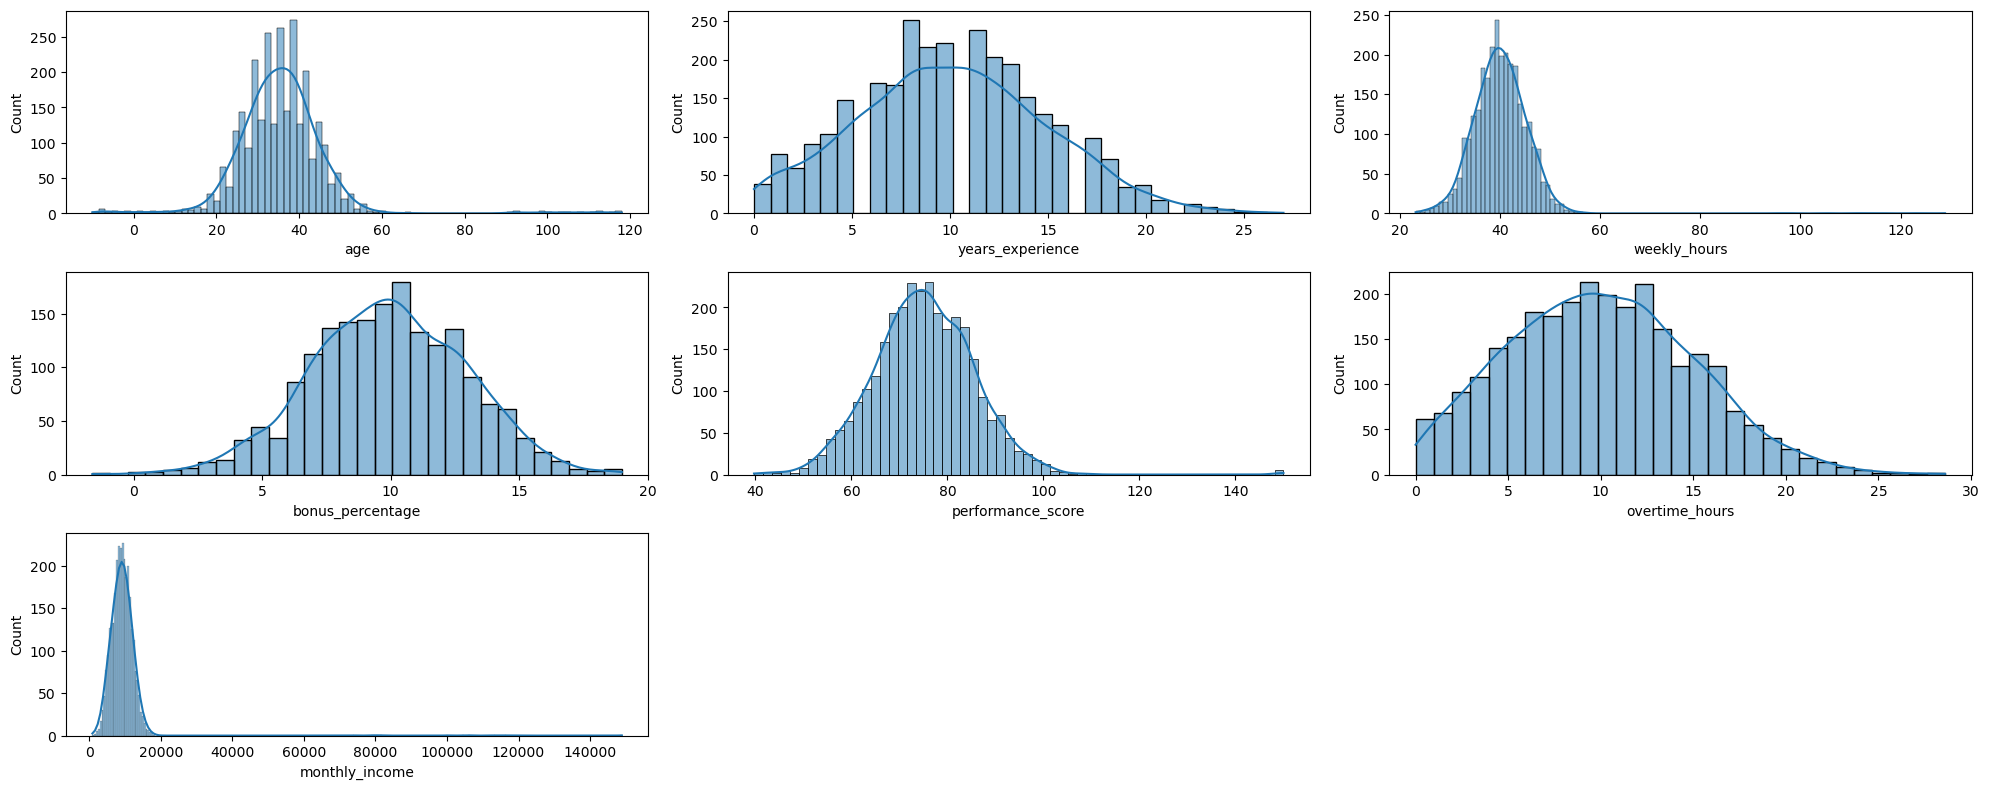

In [11]:
# Numeric columns
num_cols = df_copy.describe().columns
plt.figure(figsize=(20, 8))

# Loop through each numeric column and create subplots
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_copy[col], kde=True)
plt.tight_layout()
plt.show()

### Univariate Analysis on Numeric Columns

In this step, a **univariate analysis** is conducted on the numeric columns of the dataset to understand the distribution of each feature. This analysis provides insights into the central tendency, spread, and potential skewness of the data, which are important for selecting appropriate modeling techniques.

- **Histograms** are used to visualize the distribution of each numerical feature. This helps in identifying the shape of the distribution (e.g., normal, skewed, uniform) and spotting any outliers.
- **Kernel Density Estimation (KDE)** is also applied to provide a smoothed curve over the histogram. KDE helps in understanding the underlying probability distribution of the data and allows for better interpretation of feature density.

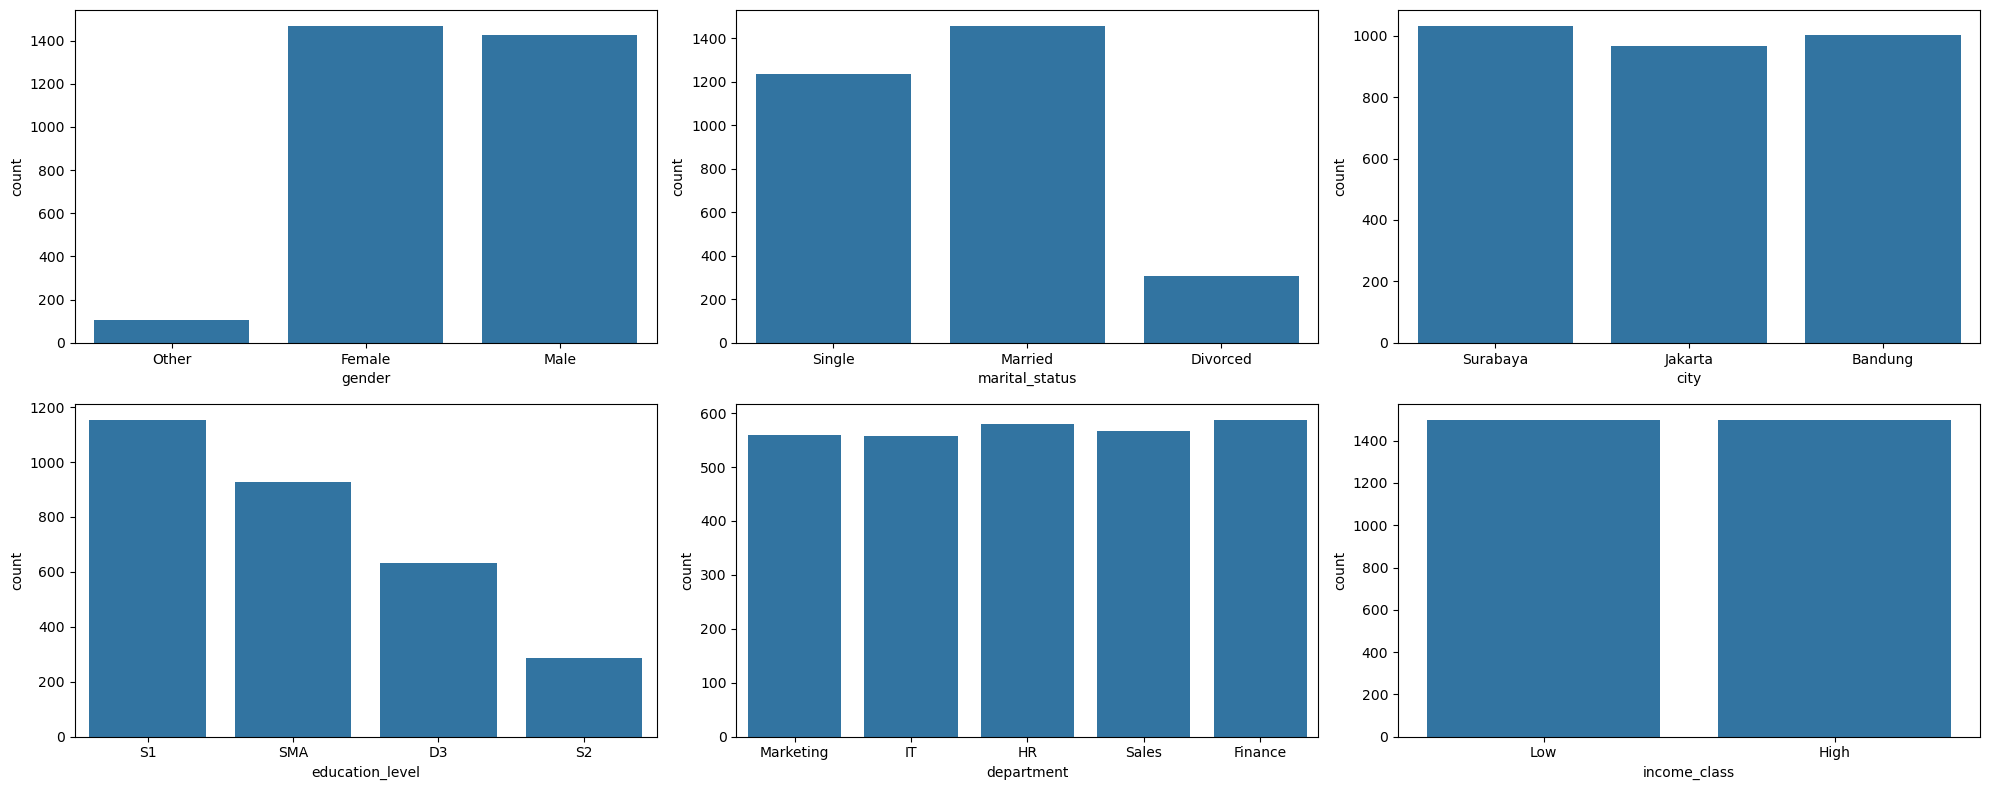

In [12]:
# Categorical columns
cols_cat = df_copy.select_dtypes(include='object').columns
plt.figure(figsize=(20, 8))

# Loop through each categorical column and create subplots
for i, cat in enumerate(cols_cat):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=cat, data=df_copy)
plt.tight_layout()
plt.show()

### Univariate Analysis on Categorical Columns

The next step involves performing a **univariate analysis** on the categorical columns to understand the distribution of different categories within each feature. This is crucial for evaluating the balance of categories and understanding the relationships in the dataset.

- **Count plots** are used to visualize the distribution of each categorical variable. The count plot displays the number of occurrences for each category, allowing for easy comparison across categories.

In [13]:
# Columns
X = df_copy.drop(columns = ['monthly_income'])

# Target
y = df_copy['monthly_income']

### 1. Define X & y

In this step, the **features** for the prediction model are defined by separating them from the target column. The target variable, **monthly_income**, is excluded from the features and will be used separately for model training.

- The columns other than **'monthly_income'** are selected as the **features**. These columns contain the input variables that the model will use to predict the monthly income.
- The **'monthly_income'** column, after being converted to a numeric format, is used as the target variable, **y**, for the regression model.

In [14]:
# Importing train_test_split from scikit-learn for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(
                                    X,  # Features (input data)
                                    y,  # Target variable (output data)
                                    test_size=0.2,  # 20% of the data will be used for testing
                                    random_state=42,  # Random seed to ensure reproducibility of the split
                                    )

### 2. Splitting the Data

In this step, the dataset is split into two subsets: one for training the model and one for testing its performance. The data is divided into **80% training data** and **20% testing data**.

- **80% of the data** is used for training the model. This portion allows the model to learn the relationships between the features and the target variable.
- **20% of the data** is reserved for testing the model. This ensures that the model is evaluated on data that it has not seen during the training phase, providing a more accurate measure of its generalization performance.

In [15]:
# Defining which columns are categorical, ordinal, and numerical
cat_cols = ['gender', 'marital_status', 'city', 'department', 'income_class']
ord_cols = ['education_level']
num_cols = ['age', 'years_experience', 'weekly_hours', 'bonus_percentage', 'performance_score', 'overtime_hours']

### 3. Defining Categorical, Ordinal, and Numerical Columns

In this step, the dataset's columns are categorized based on their data types and relationships with other variables. This classification helps in applying the appropriate preprocessing techniques for each type of feature.

- **Categorical columns** (`cat_cols`) represent features that contain discrete categories without any specific order. These columns include:
  - `gender`, `marital_status`, `city`, `department`, and `income_class`.

- **Ordinal columns** (`ord_cols`) represent features where the categories have a meaningful order but no fixed distance between them. In this case:
  - `education_level` is the ordinal feature, as it represents different levels of education that can be ranked.

- **Numerical columns** (`num_cols`) represent features that contain quantitative data and can take any numeric value. These columns include:
  - `age`, `years_experience`, `weekly_hours`, `bonus_percentage`, `performance_score`, and `overtime_hours`.

In [16]:
# Function to find outliers using Z-score method
def find_outliers_zscore(data, threshold=3):
    # Calculate the mean and standard deviation of the data
    mean = np.mean(data)
    std = np.std(data)
    
    # Calculate Z-scores
    z_scores = (data - mean) / std
    
    # Identify outliers based on the threshold (Z-score > 3 or < -3)
    outliers = data[np.abs(z_scores) > threshold]
    
    # Print summary statistics and outliers information
    print('Min :', data.min())  # Minimum value
    print('Max :', data.max())  # Maximum value
    print('Mean :', mean)       # Mean value
    print('Std :', std)         # Standard deviation
    print('Threshold : ±', threshold)  # Z-score threshold for outliers
    print('Total outliers :', len(outliers))  # Total number of outliers
    return outliers

# Check outliers for each numeric column
for col in num_cols:
    print("Column:", col)
    find_outliers_zscore(df_copy[col], threshold=3)  # Apply outlier detection function to each column
    print("="*30)  # Separator between results for each column


Column: age
Min : -10.0
Max : 118.0
Mean : 35.63846427301813
Std : 11.2157733592514
Threshold : ± 3
Total outliers : 48
Column: years_experience
Min : 0.0
Max : 27.0
Mean : 10.094240837696335
Std : 4.844260560168807
Threshold : ± 3
Total outliers : 5
Column: weekly_hours
Min : 23.1
Max : 128.9
Mean : 40.20748681898066
Std : 6.439162651485574
Threshold : ± 3
Total outliers : 9
Column: bonus_percentage
Min : -1.6
Max : 19.0
Mean : 9.912666666666667
Std : 2.996828990783437
Threshold : ± 3
Total outliers : 4
Column: performance_score
Min : 39.7
Max : 150.0
Mean : 75.15116666666667
Std : 10.512620921487121
Threshold : ± 3
Total outliers : 12
Column: overtime_hours
Min : 0.0
Max : 28.6
Mean : 9.997826086956522
Std : 4.968725631843324
Threshold : ± 3
Total outliers : 6


In [17]:
# def remove_outliers_zscore(df, cols, threshold=3):
#     """
#     Menghapus outlier berdasarkan Z-score manual.
#     """
#     mask = np.ones(len(df), dtype=bool)
    
#     for col in cols:
#         mean = np.mean(df[col])
#         std = np.std(df[col])
#         z_scores = (df[col] - mean) / std
#         mask &= (np.abs(z_scores) <= threshold) 
    
#     return df[mask]

# # remove outlier
# print("Sebelum:", df_copy.shape)

# df_copy = remove_outliers_zscore(df_copy, num_cols, threshold=3)
# print("Sesudah:", df_copy.shape)

In [ ]:
# Outlier Handling 2: Drop By Selected Index**
outlier_idx = set()

# Iterate through each numerical column
for col in num_cols:
    # Calculate the mean and standard deviation for the column
    mean = df_copy[col].mean()
    std = df_copy[col].std(ddof=1)
    
    # Calculate the Z-scores for the column
    z_scores = (df_copy[col] - mean) / std
    idx = df_copy[np.abs(z_scores) > 3].index
    outlier_idx.update(idx)

print("Before:", len(df_copy))

# Drop the rows with outliers
df_copy = df_copy.drop(index=outlier_idx)
print("After:", len(df_copy))
print("Total outliers removed:", len(outlier_idx))

Before: 3000
After: 2917
Total outliers removed: 83


### 4. Outlier Detection and Removal

Outliers can significantly impact the performance of machine learning models, so identifying and handling them is a crucial part of data preprocessing. In this step, the **Z-score method** is used to detect outliers in the numerical columns.

#### Z-score Method:
- The **Z-score** represents how many standard deviations a data point is away from the mean. By calculating the Z-scores for each data point, we can identify outliers as those whose Z-scores are greater than a predefined threshold (in this case, a Z-score of 3 or less than -3).
  
#### Steps:
1. **Calculate the Z-score** for each value in the numerical columns.
2. **Identify outliers**: If the absolute Z-score exceeds the threshold (|Z| > 3), the data point is considered an outlier.
3. **Print summary statistics**: The function also prints the minimum, maximum, mean, standard deviation, and the total number of outliers for each column to provide insight into the distribution and outliers.

#### Outlier Removal:
- After identifying the outliers, their indices are collected, and the rows containing these outliers are removed from the dataset.
- The number of rows before and after removing the outliers is printed, along with the total number of outliers removed.

This process ensures that the dataset is free from extreme values that could distort the modeling process, leading to more accurate and reliable predictions.

In [20]:
# Missing check
df_copy.isnull().sum() /len(df_copy) * 100

gender                0.000000
marital_status        0.000000
city                  0.000000
education_level       0.000000
department            5.073706
income_class          0.000000
age                   6.342132
years_experience      4.490915
weekly_hours          5.313678
bonus_percentage     39.904011
performance_score     0.000000
overtime_hours        8.056222
monthly_income        0.000000
dtype: float64

In [21]:
# Import necessary libraries for preprocessing
from sklearn.impute import SimpleImputer  # To handle missing values
from sklearn.preprocessing import OrdinalEncoder  # To encode ordinal categorical features
from sklearn.pipeline import Pipeline  # To create a series of transformations
from sklearn.preprocessing import OneHotEncoder, RobustScaler  # To handle categorical encoding and scaling
from sklearn.compose import ColumnTransformer  # To apply transformations to specific columns

# Pipeline for scaling numerical columns
scale = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),  # Impute missing values with the median
    ('scaler', RobustScaler())  # Scale numerical features using RobustScaler (handles outliers)
])

# Pipeline for encoding categorical columns (OneHotEncoding)
cat = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),  # Impute missing values with the most frequent value
    ('ohe', OneHotEncoder(drop='first'))  # Apply OneHotEncoding (drop the first category to avoid multicollinearity)
])

# Pipeline for encoding ordinal columns and scaling
ord = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),  # Impute missing values with the most frequent value
    ('edu_map', OrdinalEncoder(categories=[['SMA', 'D3', 'S1', 'S2']])),  # Map the education levels in a specific order
    ('scaler', RobustScaler())  # Scale ordinal features using RobustScaler
])

# ColumnTransformer to apply the different pipelines to appropriate columns
ct = ColumnTransformer(transformers=[
    ('ord', ord, ord_cols),  # Apply the ordinal pipeline to ordinal columns
    ('cat', cat, cat_cols),  # Apply the categorical pipeline to categorical columns
    ('scale', scale, num_cols)],  # Apply the scaling pipeline to numerical columns
                       remainder='passthrough')  # Leave other columns unchanged

In [ ]:
# Fit & transform the data using the column transformer
df_model = ct.fit_transform(df_copy)

# Get the feature names after transformation
col_names = ct.get_feature_names_out()

# Create a new DataFrame with the transformed data and the new column names
df_transformed = pd.DataFrame(df_model, columns=col_names)

# Display the transformed DataFrame
df_transformed

,ord__education_level,cat__gender_Male,cat__gender_Other,cat__marital_status_Married,cat__marital_status_Single,cat__city_Jakarta,cat__city_Surabaya,cat__department_HR,cat__department_IT,cat__department_Marketing,cat__department_Sales,cat__income_class_Low,scale__age,scale__years_experience,scale__weekly_hours,scale__bonus_percentage,scale__performance_score,scale__overtime_hours,remainder__monthly_income
0,0.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.4,0.000000,0.370968,-2.833333,-0.800000,-0.634921,7887.0
1,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.1,0.000000,0.161290,-0.166667,0.925926,0.000000,10870.0
2,-0.5,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,-1.000000,0.370968,2.333333,-1.007407,0.396825,6228.0
3,0.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.2,-1.000000,0.354839,0.000000,0.481481,0.555556,7041.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.2,0.833333,-1.435484,1.333333,-0.237037,0.619048,9657.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.1,-0.166667,-0.387097,-0.333333,-0.592593,-0.396825,11406.0
2913,-0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.2,-0.166667,1.403226,0.000000,0.325926,0.746032,8350.0
2914,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.166667,-0.790323,-2.666667,0.103704,1.682540,7918.0
2915,-0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.666667,-1.080645,0.000000,-0.229630,0.000000,6088.0


### 5. Handling Missing Values and Preprocessing

Before moving forward with model training, it's important to address any missing values in the dataset and ensure that all features are appropriately processed for machine learning. This step involves imputing missing values, encoding categorical variables, and scaling numerical features.

#### Missing Values Check:
- The first step is to check for any missing values in the dataset. The proportion of missing values for each column is calculated using the `isnull().sum()` method. This gives an overview of which features require imputation before further processing.

#### Preprocessing Pipelines:
To handle the various types of features, different preprocessing steps are applied:

- **Numerical Features (Scaling)**:
  - A **scaling pipeline** is created to handle numerical columns. This pipeline first imputes missing values using the **median** (to handle skewed distributions or outliers) and then applies **RobustScaler**, which scales the data while being robust to outliers.
  
- **Categorical Features (Encoding)**:
  - A **categorical pipeline** is used for categorical columns. This pipeline imputes missing values using the **most frequent value** and applies **OneHotEncoding** (with `drop='first'` to avoid multicollinearity). This converts categorical variables into a format suitable for machine learning algorithms.
  
- **Ordinal Features (Encoding and Scaling)**:
  - An **ordinal pipeline** is created for ordinal features like `education_level`. The missing values are imputed using the most frequent value, and the **OrdinalEncoder** is applied to map the education levels into an ordered sequence (`SMA`, `D3`, `S1`, `S2`). Additionally, **RobustScaler** is used to scale the ordinal features.

#### ColumnTransformer:
- The **ColumnTransformer** is used to apply the appropriate pipeline to each set of features: numerical columns are scaled, categorical columns are one-hot encoded, and ordinal columns are both encoded and scaled.

#### Data Transformation:
- The data is then **fit and transformed** using the column transformer, which applies the transformations to the respective columns.
- After transformation, the **feature names** are extracted to create a new DataFrame (`df_transformed`) with the transformed data and updated column names.

## Modeling

### Standard Modeling

In [23]:
# Import necessary metrics for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Common regression metrics
from sklearn.metrics import make_scorer  # To create custom scoring functions
from sklearn.metrics import max_error  # To evaluate the worst-case error
from sklearn.model_selection import cross_val_score, KFold  # For cross-validation and K-fold splitting

# Importing different regression models from scikit-learn and other libraries
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge, HuberRegressor, RANSACRegressor  # Linear and robust regressors
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors regressor
from sklearn.tree import DecisionTreeRegressor  # Decision Tree regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble methods: Random Forest and Gradient Boosting
from sklearn.svm import SVR  # Support Vector Regressor (SVM for regression)
from xgboost import XGBRegressor  # XGBoost regressor
from lightgbm import LGBMRegressor  # LightGBM regressor
from catboost import CatBoostRegressor  # CatBoost regressor
from sklearn.compose import TransformedTargetRegressor  # For transforming target variable during regression (e.g., log transformation)

### 1. Importing Metrics and Regression Models for Evaluation

The first step in the modeling phase is to import the necessary **metrics** and **regression models** that will be used for training and evaluating the model’s performance.

#### Model Evaluation Metrics:
- **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)** are commonly used regression metrics to measure the average magnitude of the errors between predicted and actual values.
- **R-squared (R²)** is used to assess the proportion of variance in the target variable that can be explained by the model.
- **Max Error** is another evaluation metric that measures the worst-case prediction error.
- **Cross-validation**: The `cross_val_score` and `KFold` functions are imported to perform cross-validation and ensure the model generalizes well on unseen data.

#### Regression Models:
Several **regression models** from different algorithms are imported, each offering different approaches to regression tasks:

- **Linear Models**: `Ridge`, `Lasso`, `ElasticNet`, `LinearRegression`, `BayesianRidge`, `HuberRegressor`, and `RANSACRegressor` are linear and robust models that can handle different types of regression problems, including regularization and outliers.
  
- **Non-Linear Models**: 
  - **KNeighborsRegressor**: A non-parametric model that predicts based on the nearest neighbors of the data points.
  - **DecisionTreeRegressor**: A tree-based model that splits data into subsets based on feature values to predict the target variable.

- **Ensemble Methods**: 
  - **RandomForestRegressor**: An ensemble method that aggregates multiple decision trees to improve accuracy and reduce overfitting.
  - **GradientBoostingRegressor**: Another ensemble method that builds trees sequentially to minimize prediction errors.

- **Advanced Models**: 
  - **Support Vector Regressor (SVR)**: Uses support vector machines for regression tasks, effective for non-linear problems.
  - **XGBRegressor**: A powerful gradient boosting model from XGBoost, known for its speed and performance.
  - **LGBMRegressor**: A gradient boosting model from LightGBM, optimized for large datasets and high performance.
  - **CatBoostRegressor**: A gradient boosting model from CatBoost, which is known for its efficiency with categorical data.

- **Target Transformation**: 
  - **TransformedTargetRegressor**: A model that can apply transformations (e.g., log transformation) to the target variable during regression, which is useful for skewed distributions.

In [24]:
# Defining a dictionary of regression models to be used for training and evaluation
models = {
    "Ridge": Ridge(),  # Ridge regression model (regularized linear regression)
    "Lasso": Lasso(),  # Lasso regression model (linear regression with L1 regularization)
    "ElasticNet": ElasticNet(),  # ElasticNet regression model (combines L1 and L2 regularization)
    "Linear Regression": LinearRegression(),  # Ordinary linear regression model
    "Bayesian Ridge": BayesianRidge(),  # Bayesian Ridge regression model (linear regression with a probabilistic approach)
    "Huber Regressor": HuberRegressor(),  # Huber Regressor (robust to outliers)
    "RANSAC": RANSACRegressor(),  # RANSAC (robust regression for datasets with a large number of outliers)
    "KNN": KNeighborsRegressor(),  # K-Nearest Neighbors regression model (non-parametric model)
    "Decision Tree": DecisionTreeRegressor(random_state=42),  # Decision Tree regression model (non-linear model)
    "RandomForest": RandomForestRegressor(random_state=42),  # Random Forest regression model (ensemble of decision trees)
    "GradientBoosting": GradientBoostingRegressor(random_state=42),  # Gradient Boosting regression model (ensemble of decision trees, boosting method)
    "SVM": SVR(),  # Support Vector Regressor (non-linear regression model based on Support Vector Machines)
    "XGBoost": XGBRegressor(random_state=42),  # XGBoost regression model (gradient boosting with high performance)
    "LGBM": LGBMRegressor(random_state=42, verbose=0),  # LightGBM regression model (efficient gradient boosting)
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)  # CatBoost regression model (gradient boosting with categorical features handling)
}

### 2. Defining a Dictionary of Regression Models

A variety of **regression models** are selected for training and evaluation, each offering distinct advantages depending on the characteristics of the dataset and the business problem. The goal is to predict **monthly income** based on various factors like experience, education level, and department, with a focus on providing actionable insights for **employee compensation optimization**. Here is the reasoning behind the choice of each model:

#### 1. **Ridge Regression**:
   - **Justification**: Ridge regression is a **regularized linear regression** model that helps prevent overfitting by penalizing large coefficients. In the context of business, where employee data may have multiple correlated features (e.g., years of experience, performance score), Ridge regression can provide more stable predictions and prevent models from being overly sensitive to specific features. This is crucial for optimizing salary predictions without being too influenced by any one factor.

#### 2. **Lasso Regression**:
   - **Justification**: Lasso regression adds **L1 regularization** to linear regression, which not only helps prevent overfitting but also performs **feature selection** by driving some coefficients to zero. This is useful in the business context, as it helps identify the most influential factors impacting employee income, making it easier for HR to focus on the key determinants when adjusting compensation packages.

#### 3. **ElasticNet Regression**:
   - **Justification**: ElasticNet combines both **L1 and L2 regularization**, making it more flexible in handling datasets with highly correlated features. For employee income prediction, where multiple factors (such as experience, performance, and education level) interact, ElasticNet can balance the strengths of both Ridge and Lasso, providing a robust model for predicting salaries while ensuring simplicity and generalization.

#### 4. **Linear Regression**:
   - **Justification**: The **ordinary linear regression model** serves as a baseline model for understanding the linear relationships between features and monthly income. In the business context, it helps to evaluate the simplest model first and assess how well the relationship between factors like age, education, and experience directly impacts income.

#### 5. **Bayesian Ridge**:
   - **Justification**: Bayesian Ridge regression provides a **probabilistic approach** to linear regression, offering insights into the uncertainty of predictions. In the context of employee income, where data may be noisy and feature relationships uncertain, this model can quantify uncertainty and provide more reliable salary predictions, especially when making decisions about compensation packages in uncertain conditions.

#### 6. **Huber Regressor**:
   - **Justification**: The Huber Regressor is **robust to outliers**, which is essential when dealing with employee data that may contain extreme values (e.g., outliers in performance scores or salary). This model ensures that salary predictions are not disproportionately affected by outliers, providing a more accurate and fair salary model.

#### 7. **RANSAC Regressor**:
   - **Justification**: The **RANSAC (Random Sample Consensus)** algorithm is a robust regression technique designed to handle datasets with a significant number of outliers. In the context of employee data, where certain entries may be anomalous, RANSAC ensures that the model remains accurate by fitting the model to the majority of inliers and excluding the outliers.

#### 8. **K-Nearest Neighbors (KNN)**:
   - **Justification**: KNN is a **non-parametric regression model** that predicts an employee’s income based on the nearest similar employees. This method is useful when there are complex, non-linear relationships in the data that other models may not capture. It’s particularly useful for segmentation-based compensation strategies, where employees in similar roles or departments may have similar salary expectations.

#### 9. **Decision Tree**:
   - **Justification**: Decision trees offer a **non-linear approach** to regression, making them useful for capturing complex decision boundaries in the data. For employee income, decision trees can model how different factors (e.g., education, department) interact to affect salary, providing transparency into how decisions about compensation are made.

#### 10. **Random Forest**:
   - **Justification**: Random Forest is an ensemble method that builds multiple decision trees and averages their predictions. It’s highly effective in capturing complex patterns in the data and is less prone to overfitting compared to individual decision trees. For employee compensation, Random Forest can provide a powerful and stable prediction model by aggregating the results of various decision trees trained on different subsets of the data.

#### 11. **Gradient Boosting**:
   - **Justification**: Gradient Boosting involves sequentially fitting decision trees, where each tree corrects the errors of the previous one. This method is known for **high predictive power**, especially in datasets with complex, non-linear relationships. In predicting employee income, Gradient Boosting can capture intricate interactions between features like performance scores and experience levels, leading to more accurate salary predictions.

#### 12. **Support Vector Regressor (SVR)**:
   - **Justification**: SVR is useful for capturing **non-linear relationships** in the data, which is important for employee compensation where factors such as experience or performance do not always have a straightforward linear effect on income. It’s particularly beneficial when the data exhibits a lot of noise or complexity.

#### 13. **XGBoost**:
   - **Justification**: XGBoost is an advanced **gradient boosting** algorithm known for its **speed and performance**. In a business setting, where quick, accurate predictions are crucial, XGBoost can help HR departments quickly analyze and adjust employee compensation strategies by providing reliable salary predictions, even with a large volume of data.

#### 14. **LightGBM**:
   - **Justification**: LightGBM is an **efficient gradient boosting model** that is optimized for speed and large datasets. Given the potentially large number of employees and factors influencing their compensation, LightGBM is particularly well-suited for scalable salary predictions that need to be computed quickly and accurately.

#### 15. **CatBoost**:
   - **Justification**: CatBoost is designed to handle **categorical data** more effectively than other models. In the context of employee income, where factors like education level, department, and city can have significant categorical influence, CatBoost can help improve prediction accuracy by leveraging categorical variables without extensive preprocessing.

By incorporating these diverse models, the goal is to ensure that we have the best possible approach for predicting employee salaries, accounting for various complexities, feature relationships, and data characteristics. This will allow businesses to make **data-driven decisions** about employee compensation, leading to fair, competitive, and well-informed salary adjustments.

In [ ]:
# Cross-validation setting
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Initialize an empty list to store results
results = []

# Loop through each model in the models dictionary
for name, model in models.items():
    # Create a pipeline that combines preprocessing and the model
    pipe = Pipeline([
        ('preprocessing', ct),  # Apply the column transformer (preprocessing)
        ('model', model)  # Apply the model
    ])

    # Scoring methods for model evaluation using cross-validation
    rmse = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error').mean()  # Root Mean Squared Error

    mae = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()  # Mean Absolute Error

    mse = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()  # Mean Squared Error

    r2 = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='r2').mean()  # R-squared (coefficient of determination)

    mape = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error').mean()  # Mean Absolute Percentage Error

    medae = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_median_absolute_error').mean()  # Median Absolute Error
    
    max_err = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring=make_scorer(max_error, greater_is_better=False)).mean()  # Maximum Error

    # Store the results of each model
    results.append({
        "Model": name,  # Model name
        "RMSE": rmse,  # Root Mean Squared Error
        "MAE": mae,  # Mean Absolute Error
        "MSE": mse,  # Mean Squared Error
        "R2": r2,  # R-squared
        "MAPE": mape,  # Mean Absolute Percentage Error
        "MedAE": medae,  # Median Absolute Error
        "MaxError": max_err  # Maximum Error
    })

### 3. Cross-Validation and Model Evaluation

To evaluate the performance of the regression models and ensure they generalize well to unseen data, **cross-validation** is applied. Cross-validation helps assess the model's accuracy, robustness, and stability by testing it on multiple subsets of the dataset.

#### K-Fold Cross-Validation:
- **KFold** is used to split the dataset into **5 folds**, with shuffling enabled to ensure that each fold is representative of the overall dataset. A **random_state** is set to ensure reproducibility.
  
#### Model Evaluation Metrics:
For each model in the dictionary, multiple performance metrics are calculated using cross-validation:

1. **Root Mean Squared Error (RMSE)**:
   - RMSE measures the square root of the average squared differences between predicted and actual values. It provides an overall sense of how well the model is predicting employee salaries, with lower values indicating better performance.

2. **Mean Absolute Error (MAE)**:
   - MAE computes the average absolute differences between predicted and actual values. It is a more interpretable metric as it represents the average error in the same units as the target variable (monthly income).

3. **Mean Squared Error (MSE)**:
   - MSE calculates the average of the squared differences between predicted and actual values. Like RMSE, it gives an indication of model accuracy but penalizes larger errors more severely.

4. **R-squared (R²)**:
   - R² is a measure of how well the model explains the variance in the target variable (monthly income). A higher R² value indicates that the model is capturing more of the variance in the data, leading to better predictions.

5. **Mean Absolute Percentage Error (MAPE)**:
   - MAPE expresses the error as a percentage of the actual values, providing an easy-to-understand metric for model accuracy. It is particularly useful for understanding relative errors in the predictions.

6. **Median Absolute Error (MedAE)**:
   - MedAE measures the median of absolute differences between predicted and actual values, offering a robust alternative to MAE that is less affected by outliers.

7. **Maximum Error**:
   - This metric assesses the worst-case error in predictions. It highlights the largest discrepancy between predicted and actual values, helping to understand the potential risks in model predictions.

In [ ]:
# Check the best model by RMSE (Root Mean Squared Error)
df_result1 = pd.DataFrame(results).sort_values('RMSE').reset_index(drop=True)
df_result1

,Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,CatBoost,5120.494824,1310.751525,2.827169e+07,0.226472,0.129129,714.155539,88182.674978
1,Bayesian Ridge,5181.264365,1223.569931,2.836633e+07,0.217650,0.121777,785.501410,93625.209908
2,Huber Regressor,5183.608031,1058.173451,2.838332e+07,0.216721,0.101550,604.443652,94380.201653
3,Lasso,5189.884796,1268.828845,2.844694e+07,0.214795,0.126053,815.911792,93544.533159
4,Ridge,5190.292654,1270.779353,2.845169e+07,0.214675,0.126262,819.908602,93538.443960
5,Linear Regression,5190.689128,1272.542837,2.845549e+07,0.214545,0.126441,821.977349,93535.950224
6,RANSAC,5208.799796,1111.838068,2.846414e+07,0.212238,0.108189,661.638716,94466.842364
7,ElasticNet,5270.438100,1339.483895,2.934015e+07,0.190409,0.152586,802.430662,94454.439120
8,LGBM,5453.025043,1580.926643,3.110675e+07,0.126960,0.157588,887.661973,94280.448212
9,XGBoost,5578.165597,1353.350591,3.345099e+07,0.044977,0.134729,731.984082,92817.602344


**Insight:**
- CatBoost leads with the lowest RMSE of 5120.49, indicating that it is the most accurate model in terms of minimizing squared errors. CatBoost is particularly effective at handling categorical features and non-linear relationships, which makes it the best choice for predicting employee monthly income in this context.

In [ ]:
# Check the best model by MAE (Mean Absolute Error)
df_result2 = pd.DataFrame(results).sort_values('MAE').reset_index(drop=True)
df_result2

,Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,Huber Regressor,5183.608031,1058.173451,2.838332e+07,0.216721,0.101550,604.443652,94380.201653
1,RANSAC,5208.799796,1111.838068,2.846414e+07,0.212238,0.108189,661.638716,94466.842364
2,Bayesian Ridge,5181.264365,1223.569931,2.836633e+07,0.217650,0.121777,785.501410,93625.209908
3,Lasso,5189.884796,1268.828845,2.844694e+07,0.214795,0.126053,815.911792,93544.533159
4,Ridge,5190.292654,1270.779353,2.845169e+07,0.214675,0.126262,819.908602,93538.443960
5,Linear Regression,5190.689128,1272.542837,2.845549e+07,0.214545,0.126441,821.977349,93535.950224
6,CatBoost,5120.494824,1310.751525,2.827169e+07,0.226472,0.129129,714.155539,88182.674978
7,ElasticNet,5270.438100,1339.483895,2.934015e+07,0.190409,0.152586,802.430662,94454.439120
8,XGBoost,5578.165597,1353.350591,3.345099e+07,0.044977,0.134729,731.984082,92817.602344
9,RandomForest,5753.173713,1386.435304,3.550919e+07,-0.029353,0.131232,698.229000,90781.532000


**Insight:**
- Huber Regressor is the best model in terms of MAE with a value of 1058.17, indicating that, on average, its predictions are off by about 1,058 units. This suggests it provides accurate predictions while minimizing absolute error in the test set.

In [ ]:
# Check the best model by MAPE (Mean Absolute Percentage Error)
df_result3 = pd.DataFrame(results).sort_values('MAPE').reset_index(drop=True)
df_result3

,Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,Huber Regressor,5183.608031,1058.173451,2.838332e+07,0.216721,0.101550,604.443652,94380.201653
1,RANSAC,5208.799796,1111.838068,2.846414e+07,0.212238,0.108189,661.638716,94466.842364
2,Bayesian Ridge,5181.264365,1223.569931,2.836633e+07,0.217650,0.121777,785.501410,93625.209908
3,Lasso,5189.884796,1268.828845,2.844694e+07,0.214795,0.126053,815.911792,93544.533159
4,Ridge,5190.292654,1270.779353,2.845169e+07,0.214675,0.126262,819.908602,93538.443960
5,Linear Regression,5190.689128,1272.542837,2.845549e+07,0.214545,0.126441,821.977349,93535.950224
6,CatBoost,5120.494824,1310.751525,2.827169e+07,0.226472,0.129129,714.155539,88182.674978
7,RandomForest,5753.173713,1386.435304,3.550919e+07,-0.029353,0.131232,698.229000,90781.532000
8,XGBoost,5578.165597,1353.350591,3.345099e+07,0.044977,0.134729,731.984082,92817.602344
9,GradientBoosting,5735.473848,1415.040693,3.413428e+07,0.008243,0.138127,744.647057,92379.099670


**Insight:**
- Huber Regressor performs the best with the lowest MAPE of 10.16%, indicating that, on average, the model's predictions are off by approximately 10.16%. This is a strong performance, showing that the Huber Regressor provides highly accurate predictions in terms of relative error, making it the most reliable model for employee monthly income prediction.

In [ ]:
# Check the best model by MSE (Mean Squared Error)
df_result4 = pd.DataFrame(results).sort_values('MSE').reset_index(drop=True)
df_result4

,Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,CatBoost,5120.494824,1310.751525,2.827169e+07,0.226472,0.129129,714.155539,88182.674978
1,Bayesian Ridge,5181.264365,1223.569931,2.836633e+07,0.217650,0.121777,785.501410,93625.209908
2,Huber Regressor,5183.608031,1058.173451,2.838332e+07,0.216721,0.101550,604.443652,94380.201653
3,Lasso,5189.884796,1268.828845,2.844694e+07,0.214795,0.126053,815.911792,93544.533159
4,Ridge,5190.292654,1270.779353,2.845169e+07,0.214675,0.126262,819.908602,93538.443960
5,Linear Regression,5190.689128,1272.542837,2.845549e+07,0.214545,0.126441,821.977349,93535.950224
6,RANSAC,5208.799796,1111.838068,2.846414e+07,0.212238,0.108189,661.638716,94466.842364
7,ElasticNet,5270.438100,1339.483895,2.934015e+07,0.190409,0.152586,802.430662,94454.439120
8,LGBM,5453.025043,1580.926643,3.110675e+07,0.126960,0.157588,887.661973,94280.448212
9,XGBoost,5578.165597,1353.350591,3.345099e+07,0.044977,0.134729,731.984082,92817.602344


**Insight:**
- CatBoost leads with the lowest MSE of 2.83e+07, making it the most accurate model in minimizing squared errors. This suggests that CatBoost is very effective at capturing the underlying patterns in the data and making precise predictions for monthly income.

### 4. Check Best 2 Model in Test Set
After evaluating all the models using cross-validation, the next step is to focus on the top two models that performed well during the validation phase. In this case, **Huber Regressor** and **CatBoost Regressor** were selected for further evaluation on the test set to assess their generalization performance.

In [31]:
# Define the models to be evaluated
models = {"Huber Regressor": HuberRegressor(),
          "CatBoost": CatBoostRegressor(random_state=42, verbose=0)}

# Initialize an empty list to store the evaluation results
results = []

# Loop through each model in the models dictionary
for name, model in models.items():
    # Create a pipeline with preprocessing and the current model
    pipe = Pipeline([
        ('preprocessing', ct),  # Apply the column transformer (preprocessing steps)
        ('model', model)  # Apply the current model
    ])

    # Cross-validation metrics (validation scores)
    rmse_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error').mean()  # RMSE (Root Mean Squared Error)
    
    mae_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()  # MAE (Mean Absolute Error)

    mape_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error').mean()  # MAPE (Mean Absolute Percentage Error)

    # Fit the model on the training data and evaluate on the test set
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)  # Make predictions on the test set

    # Test metrics (on the test set)
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)  # RMSE on the test set
    mae_test = mean_absolute_error(y_test, y_pred)  # MAE on the test set
    mape_test = (abs((y_test - y_pred) / y_test).mean()) * 100  # MAPE on the test set (in percentage)

    # Store the evaluation results for each model
    results.append({
        "Model": name,
        "RMSE Validation": rmse_val,
        "MAE Validation": mae_val,
        "MAPE Validation": mape_val,
        "RMSE Test": rmse_test,
        "MAE Test": mae_test,
        "MAPE Test (%)": mape_test
    })

# Sort the results by RMSE on the test set and display the final results
df_results_test_1 = pd.DataFrame(results).sort_values('RMSE Test')
df_results_test_1

,Model,RMSE Validation,MAE Validation,MAPE Validation,RMSE Test,MAE Test,MAPE Test (%)
0,Huber Regressor,5183.608031,1058.173451,0.101550,5724.986896,1078.983844,9.933893
1,CatBoost,5120.494824,1310.751525,0.129129,5934.359472,1285.014998,11.558038


**Insights:**
- **Huber Regressor** performs slightly better than **CatBoost Regressor** in terms of both RMSE and MAE on the test set, suggesting it may be a more reliable model for predicting **monthly income**.
- **CatBoost Regressor**, while slightly less accurate, is still a strong model and may be better suited for cases with non-linear relationships or categorical variables.
- **Huber Regressor** is likely the preferred model given its better performance in terms of both **absolute error** and **percentage error** (MAPE) on the test set, making it a solid choice for businesses seeking reliable salary predictions.

### 5. Modeling: Log Transform
To address the issue of non-linearity in predicting employee income, a **log transformation** is applied to the target variable, **monthly_income**, to stabilize variance and make the data more normally distributed. This transformation can help improve model performance, especially when the distribution of the target variable is skewed.

In [32]:
# Define the models
models = {
    "Ridge": Ridge(),  # Ridge regression model (regularized linear regression)
    "Lasso": Lasso(),  # Lasso regression model (linear regression with L1 regularization)
    "ElasticNet": ElasticNet(),  # ElasticNet regression model (combines L1 and L2 regularization)
    "Linear Regression": LinearRegression(),  # Ordinary linear regression model
    "Bayesian Ridge": BayesianRidge(),  # Bayesian Ridge regression model (probabilistic approach)
    "Huber Regressor": HuberRegressor(),  # Huber Regressor (robust to outliers)
    "RANSAC": RANSACRegressor(),  # RANSAC (robust regression method for outliers)
    "KNN": KNeighborsRegressor(),  # K-Nearest Neighbors regression model
    "Decision Tree": DecisionTreeRegressor(random_state=42),  # Decision Tree regression model
    "RandomForest": RandomForestRegressor(random_state=42),  # Random Forest regression model
    "GradientBoosting": GradientBoostingRegressor(random_state=42),  # Gradient Boosting regression model
    "SVM": SVR(),  # Support Vector Regressor (SVM for regression)
    "XGBoost": XGBRegressor(random_state=42),  # XGBoost regression model
    "LGBM": LGBMRegressor(random_state=42, verbose=0),  # LightGBM regression model
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)  # CatBoost regression model
}

# Apply log transformation to all models using TransformedTargetRegressor
log_models = {name: TransformedTargetRegressor(regressor=model, func=np.log, inverse_func=np.exp)
              for name, model in models.items()}

### 6. Evaluating Log-Transformed Models

After applying the **log transformation** to the target variable, the next step is to evaluate the performance of the regression models using **cross-validation**. This evaluation helps assess the effectiveness of the log transformation in improving model predictions for employee income.

#### Cross-Validation:
- **K-Fold Cross-Validation** is used to split the training data into **5 folds**, providing a robust estimate of model performance. The model is trained on different subsets of the data and evaluated on the remaining portion to ensure that it generalizes well to unseen data.
  
#### Model Evaluation Metrics:
For each model in the `log_models` dictionary, the following performance metrics are computed during cross-validation:

1. **Root Mean Squared Error (RMSE)**: Measures the average magnitude of errors in predictions, with larger errors being penalized more. Lower RMSE indicates better performance.
2. **Mean Absolute Error (MAE)**: Provides the average absolute error in predictions. MAE is more interpretable and less sensitive to outliers than RMSE.
3. **Mean Squared Error (MSE)**: Similar to RMSE but without taking the square root, emphasizing larger errors more.
4. **R-squared (R²)**: Indicates the proportion of variance in the target variable that the model explains. Higher values are better.
5. **Mean Absolute Percentage Error (MAPE)**: Measures the average error as a percentage of the actual values, useful for understanding relative prediction accuracy.
6. **Median Absolute Error (MedAE)**: Offers a robust metric that minimizes the impact of outliers by using the median of absolute errors.
7. **Maximum Error**: Assesses the worst-case prediction error, highlighting the largest discrepancy between predicted and actual values.

In [33]:
# Initialize an empty list to store the results
results = []

# Loop through each model in the log_models dictionary
for name, model in log_models.items():
    # Create a pipeline that combines preprocessing and the current model
    pipe = Pipeline([
        ('preprocessing', ct),  # Apply the column transformer (preprocessing steps)
        ('model', model)  # Apply the current model
    ])

    # Scoring methods for model evaluation using cross-validation
    rmse = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error').mean()  # RMSE (Root Mean Squared Error)
    mae = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()  # MAE (Mean Absolute Error)
    mse = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()  # MSE (Mean Squared Error)
    r2 = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='r2').mean()  # R-squared (coefficient of determination)
    mape = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error').mean()  # MAPE (Mean Absolute Percentage Error)
    medae = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_median_absolute_error').mean()  # Median Absolute Error
    max_err = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring=make_scorer(max_error, greater_is_better=False)).mean()  # Maximum Error

    # Store the results for each model
    results.append({
        "Log Model": name,  # Model name
        "RMSE": rmse,  # RMSE on validation data
        "MAE": mae,  # MAE on validation data
        "MSE": mse,  # MSE on validation data
        "R2": r2,  # R-squared on validation data
        "MAPE": mape,  # MAPE on validation data
        "MedAE": medae,  # Median Absolute Error on validation data
        "MaxError": max_err  # Maximum Error on validation data
    })

In [ ]:
# Check the best model by RMSE (Root Mean Squared Error)
df_result1 = pd.DataFrame(results).sort_values('RMSE').reset_index(drop=True)
df_result1

,Log Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,XGBoost,4949.413459,1204.674358,2.677576e+07,0.270093,0.119794,720.479785,88969.207812
1,RandomForest,5021.027222,1171.128005,2.707938e+07,0.262105,0.112907,699.341746,90277.582213
2,CatBoost,5096.839315,1129.034141,2.756243e+07,0.244237,0.107938,689.308180,92990.813460
3,GradientBoosting,5133.582133,1134.811614,2.791317e+07,0.232424,0.107657,670.158261,92673.145569
4,LGBM,5175.004880,1187.071438,2.827286e+07,0.218904,0.114184,733.091001,93545.709035
5,Linear Regression,5189.260250,1156.210635,2.837006e+07,0.213494,0.113380,694.865471,93898.807299
6,Ridge,5189.275446,1155.649368,2.837049e+07,0.213495,0.113338,694.762012,93901.900605
7,Bayesian Ridge,5189.374210,1153.022152,2.837277e+07,0.213491,0.113143,693.989151,93916.827228
8,Huber Regressor,5189.924126,1107.037653,2.840064e+07,0.213795,0.111538,658.293712,94138.553152
9,SVM,5212.574311,1192.273711,2.871031e+07,0.208272,0.116025,704.362447,94370.556061


**Insight:**
- XGBoost has the lowest RMSE of 4949.41, indicating that it performs the best in terms of minimizing prediction error. This suggests that XGBoost is the most accurate model in predicting monthly income among all the models tested.

In [ ]:
# Check the best model by MAE (Mean Absolute Error)
df_result2 = pd.DataFrame(results).sort_values('MAE').reset_index(drop=True)
df_result2

,Log Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,Huber Regressor,5189.924126,1107.037653,2.840064e+07,0.213795,0.111538,658.293712,94138.553152
1,CatBoost,5096.839315,1129.034141,2.756243e+07,0.244237,0.107938,689.308180,92990.813460
2,GradientBoosting,5133.582133,1134.811614,2.791317e+07,0.232424,0.107657,670.158261,92673.145569
3,Bayesian Ridge,5189.374210,1153.022152,2.837277e+07,0.213491,0.113143,693.989151,93916.827228
4,Ridge,5189.275446,1155.649368,2.837049e+07,0.213495,0.113338,694.762012,93901.900605
5,Linear Regression,5189.260250,1156.210635,2.837006e+07,0.213494,0.113380,694.865471,93898.807299
6,RandomForest,5021.027222,1171.128005,2.707938e+07,0.262105,0.112907,699.341746,90277.582213
7,LGBM,5175.004880,1187.071438,2.827286e+07,0.218904,0.114184,733.091001,93545.709035
8,SVM,5212.574311,1192.273711,2.871031e+07,0.208272,0.116025,704.362447,94370.556061
9,RANSAC,5242.636771,1203.164382,2.861610e+07,0.204786,0.121432,728.404265,94720.459737


**Insight:**
- Huber Regressor has the lowest MAE of 1107.04, indicating that it is the most accurate model in terms of average absolute error. This makes it the best model in terms of predicting monthly income with the least deviation from actual values.

In [ ]:
# Check the best model by MSE (Mean Squared Error)
df_result3 = pd.DataFrame(results).sort_values('MSE').reset_index(drop=True)
df_result3

,Log Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,XGBoost,4949.413459,1204.674358,2.677576e+07,0.270093,0.119794,720.479785,88969.207812
1,RandomForest,5021.027222,1171.128005,2.707938e+07,0.262105,0.112907,699.341746,90277.582213
2,CatBoost,5096.839315,1129.034141,2.756243e+07,0.244237,0.107938,689.308180,92990.813460
3,GradientBoosting,5133.582133,1134.811614,2.791317e+07,0.232424,0.107657,670.158261,92673.145569
4,LGBM,5175.004880,1187.071438,2.827286e+07,0.218904,0.114184,733.091001,93545.709035
5,Linear Regression,5189.260250,1156.210635,2.837006e+07,0.213494,0.113380,694.865471,93898.807299
6,Ridge,5189.275446,1155.649368,2.837049e+07,0.213495,0.113338,694.762012,93901.900605
7,Bayesian Ridge,5189.374210,1153.022152,2.837277e+07,0.213491,0.113143,693.989151,93916.827228
8,Huber Regressor,5189.924126,1107.037653,2.840064e+07,0.213795,0.111538,658.293712,94138.553152
9,RANSAC,5242.636771,1203.164382,2.861610e+07,0.204786,0.121432,728.404265,94720.459737


**Insight:**
- XGBoost emerges as the best model for minimizing MSE, with a value of 2.68e+07. This confirms that XGBoost is not only the most accurate in terms of RMSE but also performs very well in minimizing squared errors. This makes it the best choice for predicting monthly income with a high degree of accuracy.

In [ ]:
# Check the best model by MAPE (Mean Absolute Percentage Error)
df_result4 = pd.DataFrame(results).sort_values('MAPE').reset_index(drop=True)
df_result4

,Log Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,GradientBoosting,5133.582133,1134.811614,2.791317e+07,0.232424,0.107657,670.158261,92673.145569
1,CatBoost,5096.839315,1129.034141,2.756243e+07,0.244237,0.107938,689.308180,92990.813460
2,Huber Regressor,5189.924126,1107.037653,2.840064e+07,0.213795,0.111538,658.293712,94138.553152
3,RandomForest,5021.027222,1171.128005,2.707938e+07,0.262105,0.112907,699.341746,90277.582213
4,Bayesian Ridge,5189.374210,1153.022152,2.837277e+07,0.213491,0.113143,693.989151,93916.827228
5,Ridge,5189.275446,1155.649368,2.837049e+07,0.213495,0.113338,694.762012,93901.900605
6,Linear Regression,5189.260250,1156.210635,2.837006e+07,0.213494,0.113380,694.865471,93898.807299
7,LGBM,5175.004880,1187.071438,2.827286e+07,0.218904,0.114184,733.091001,93545.709035
8,SVM,5212.574311,1192.273711,2.871031e+07,0.208272,0.116025,704.362447,94370.556061
9,XGBoost,4949.413459,1204.674358,2.677576e+07,0.270093,0.119794,720.479785,88969.207812


**Insight:**
- GradientBoosting stands out as the best model with the lowest MAPE of 10.77%, meaning that, on average, its predictions for employee monthly income are off by about 10.77%. This makes it the most reliable model in terms of percentage error.

In [ ]:
# Check the best model by MedAE (Median Absolute Error)
df_result5 = pd.DataFrame(results).sort_values('MedAE').reset_index(drop=True)
df_result5

,Log Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,Huber Regressor,5189.924126,1107.037653,2.840064e+07,0.213795,0.111538,658.293712,94138.553152
1,GradientBoosting,5133.582133,1134.811614,2.791317e+07,0.232424,0.107657,670.158261,92673.145569
2,CatBoost,5096.839315,1129.034141,2.756243e+07,0.244237,0.107938,689.308180,92990.813460
3,Bayesian Ridge,5189.374210,1153.022152,2.837277e+07,0.213491,0.113143,693.989151,93916.827228
4,Ridge,5189.275446,1155.649368,2.837049e+07,0.213495,0.113338,694.762012,93901.900605
5,Linear Regression,5189.260250,1156.210635,2.837006e+07,0.213494,0.113380,694.865471,93898.807299
6,RandomForest,5021.027222,1171.128005,2.707938e+07,0.262105,0.112907,699.341746,90277.582213
7,SVM,5212.574311,1192.273711,2.871031e+07,0.208272,0.116025,704.362447,94370.556061
8,XGBoost,4949.413459,1204.674358,2.677576e+07,0.270093,0.119794,720.479785,88969.207812
9,RANSAC,5242.636771,1203.164382,2.861610e+07,0.204786,0.121432,728.404265,94720.459737


**Insight:**
- Huber Regressor has the lowest MedAE of 658.29, indicating that it is the best model in terms of median error. This makes it the most robust model, particularly when the dataset contains outliers or extreme values. The Huber Regressor’s ability to minimize the median error is particularly valuable when predicting employee salaries, as income data often includes outliers.

### 7. Check Best 2 Log Model in Test Set
After identifying **XGBoost** and **Huber Regressor** as the top-performing models based on various evaluation metrics like **RMSE**, **MAE**, and **MAPE**, these two models are selected for further evaluation with the **log transformation** applied to the target variable. The goal is to check their performance on the test set after applying the transformation, as log transformation can help improve the model's performance by reducing skewness and handling outliers better.

In [39]:
# Select the models to be used
selected_models = {
    "XGBoost": XGBRegressor(random_state=42),  # XGBoost regression model
    "Huber Regressor": HuberRegressor()  # Huber Regressor (robust to outliers)
}

# Apply log transformation to the selected models using TransformedTargetRegressor
log_models = {name: TransformedTargetRegressor(regressor=model, func=np.log, inverse_func=np.exp)
              for name, model in selected_models.items()}

In [40]:
# Initialize an empty list to store the evaluation results
results = []

# Loop through each model in the log_models dictionary
for name, model in log_models.items():
    # Create a pipeline that combines preprocessing and the current model
    pipe = Pipeline([
        ('preprocessing', ct),  # Apply the column transformer (preprocessing steps)
        ('model', model)  # Apply the current model
    ])

    # Cross-validation metrics (validation scores)
    rmse_val = -cross_val_score(
        pipe, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error').mean()  # RMSE (Root Mean Squared Error)

    mae_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()  # MAE (Mean Absolute Error)

    mape_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error').mean()  # MAPE (Mean Absolute Percentage Error)

    # Fit the model on the training data and evaluate on the test set
    pipe.fit(X_train, y_train)  # Fit the pipeline to the training data
    y_pred = pipe.predict(X_test)  # Make predictions on the test set

    # Test metrics (on the test set)
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)  # RMSE on the test set
    mae_test = mean_absolute_error(y_test, y_pred)  # MAE on the test set
    mape_test = (abs((y_test - y_pred) / y_test).mean()) * 100  # MAPE on the test set (in percentage)

    # Store the results for each model
    results.append({
        "Model": name,  # Model name
        "RMSE Validation": rmse_val,  # RMSE on validation data
        "MAE Validation": mae_val,  # MAE on validation data
        "MAPE Validation": mape_val,  # MAPE on validation data
        "RMSE Test": rmse_test,  # RMSE on test data
        "MAE Test": mae_test,  # MAE on test data
        "MAPE Test (%)": mape_test  # MAPE on test data (percentage)
    })

In [ ]:
# Final results log model
df_results_test_2 = pd.DataFrame(results).sort_values('RMSE Test')
df_results_test_2

,Model,RMSE Validation,MAE Validation,MAPE Validation,RMSE Test,MAE Test,MAPE Test (%)
1,Huber Regressor,5189.924126,1107.037653,0.111538,5739.368851,1105.779708,10.572149
0,XGBoost,4949.413459,1204.674358,0.119794,6582.931440,1347.937639,12.059966


**Insight:**
- Huber Regressor emerges as the best model overall, with the lowest RMSE, lowest MAE, and lowest MAPE on the test set. It is the most accurate model for predicting employee monthly income, making it the top choice for businesses looking to optimize compensation.
- XGBoost performs slightly worse than Huber Regressor, with higher error metrics across RMSE, MAE, and MAPE. While it is still a powerful model, especially for capturing complex relationships, its performance is less precise compared to Huber Regressor when applied to employee income data.

**Conclusion:**
- Huber Regressor is the recommended model for predicting employee salaries, as it provides the most reliable and accurate predictions, with minimal error.

In [ ]:
# Final results standar model
df_results_test_1

,Model,RMSE Validation,MAE Validation,MAPE Validation,RMSE Test,MAE Test,MAPE Test (%)
0,Huber Regressor,5183.608031,1058.173451,0.101550,5724.986896,1078.983844,9.933893
1,CatBoost,5120.494824,1310.751525,0.129129,5934.359472,1285.014998,11.558038


**Analysis of Results:**
- RMSE (Root Mean Squared Error):
    - The lower the RMSE, the better the model's predictive accuracy.
    - Huber Regressor (Standard) outperforms the log-transformed version, with the lowest RMSE values for both the validation and test sets.
        - RMSE Validation (Standard): 5183.61
        - RMSE Test (Standard): 5724.99
    - This indicates that the standard Huber Regressor consistently produces smaller errors on both the validation and test data, making it the most reliable model in terms of overall accuracy.

- MAE (Mean Absolute Error):
    - Huber Regressor (Standard) also shows superior performance in terms of MAE compared to the log-transformed models.
        - MAE Validation (Standard): 1058.17
        - MAE Test (Standard): 1078.98
    - A lower MAE signifies that the model’s predictions are generally closer to the true values, with fewer large deviations. The standard model's lower MAE suggests more precise predictions, with minimal absolute error.

- MAPE (Mean Absolute Percentage Error):
    - MAPE gives an understanding of the percentage error in predictions, which is crucial for business applications like predicting employee income.
    - The standard Huber Regressor performs better with a lower MAPE on the test data.
        - MAPE Test (Standard): 9.93%
    - While Huber Regressor (Log-transformed) showed some improvement in terms of MAPE and RMSE on the validation set, it does not outperform the standard version on the test set. This highlights that the log transformation did not provide a significant advantage for this particular dataset.

**Conclusion:**
- Huber Regressor (Standard) is the best model overall, performing the best in all evaluation metrics (RMSE, MAE, and MAPE) on both the validation and test datasets.
- Despite the log-transformation showing some improvement in specific metrics (especially MAPE), the standard model is more consistent and performs better across both datasets.
- Based on these results, Huber Regressor (Standard) is the most reliable model for predicting monthly income in this case, and it is recommended for businesses seeking to optimize compensation predictions with minimal error.

In [43]:
# Huber Regressor (standard version)
huber = HuberRegressor()

# Combine with preprocessing (e.g., 'transform' for feature preprocessing)
huber_pipeline = Pipeline([
    ('preprocessing', ct),  # 'ct' should be previously defined as the preprocessing step
    ('model', huber)  # Apply the Huber Regressor model
])

# Fit the pipeline to the training data
huber_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = huber_pipeline.predict(X_test)

# Evaluate the model's performance
rmse_default = mean_squared_error(y_test, y_pred, squared=False)  # RMSE (Root Mean Squared Error)
mae_default = mean_absolute_error(y_test, y_pred)  # MAE (Mean Absolute Error)
mape_default = (np.abs((y_test - y_pred) / y_test).mean()) * 100  # MAPE (Mean Absolute Percentage Error in percentage)

# Print the evaluation results
print(f"RMSE: {rmse_default}")
print(f"MAE: {mae_default}")
print(f"MAPE: {mape_default}")

RMSE: 5724.986896364635
MAE: 1078.9838437743847
MAPE: 9.933893046643238


## Hyperparameter Tuning
Hyperparameter tuning was performed on the Huber Regressor to improve model performance. The hyperparameter tuning process aims to find the best combination of hyperparameters that optimizes the model’s accuracy, in this case by reducing RMSE, MAE, and MAPE on the test set.

In [44]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning parameters
param_distributions = {
    'model__alpha': np.logspace(-3, 2, 50),  # Regularization strength (alpha) for Huber Regressor
    'model__epsilon': np.linspace(1.35, 2.25, 50),  # Threshold for outliers (epsilon) for Huber Regressor
    'model__fit_intercept': [True, False],  # Whether to calculate the intercept (True or False)
    'model__max_iter': [100, 150, 200, 250],  # Maximum number of iterations for optimization
    'model__tol': [1e-4, 1e-5, 1e-6],  # Tolerance for stopping criteria (precision of the optimization)
    'model__warm_start': [True, False]  # Whether to reuse the previous solution for faster convergence
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=huber_pipeline,  # The pipeline (Huber Regressor with preprocessing)
    param_distributions=param_distributions,  # Hyperparameter search space
    n_iter=20,  # Number of combinations to try
    scoring='neg_root_mean_squared_error',  # Scoring metric for evaluation (negative RMSE)
    cv=5,  # Cross-validation with 5 folds
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available processors for parallel computation
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the best cross-validation RMSE score
print("Best Parameters:", random_search.best_params_)
print("Best CV RMSE:", -random_search.best_score_)

# Make predictions on the test set using the tuned model
y_pred = random_search.predict(X_test)

# Evaluate the tuned model on the test set
rmse_best = mean_squared_error(y_test, y_pred, squared=False)  # RMSE for the test set
mae_best = mean_absolute_error(y_test, y_pred)  # MAE for the test set
mape_best = (np.abs((y_test - y_pred) / y_test).mean()) * 100  # MAPE for the test set (in percentage)

# Compare the results of the default model and the tuned model
df_compare = pd.DataFrame({
    'Model': ['Huber_Default', 'Huber_Tuned'],
    'RMSE Test': [rmse_default, rmse_best],  # RMSE on the test set for both models
    'MAE Test': [mae_default, mae_best],  # MAE on the test set for both models
    'MAPE Test (%)': [mape_default, mape_best]  # MAPE on the test set for both models (in percentage)
})

# Display the comparison results
df_compare

Best Parameters: {'model__warm_start': False, 'model__tol': 1e-05, 'model__max_iter': 100, 'model__fit_intercept': True, 'model__epsilon': 1.8826530612244898, 'model__alpha': 0.004094915062380427}
Best CV RMSE: 5038.007058967423


,Model,RMSE Test,MAE Test,MAPE Test (%)
0,Huber_Default,5724.986896,1078.983844,9.933893
1,Huber_Tuned,5724.378547,1080.014177,9.930330


**Insight:**
- RMSE (Root Mean Squared Error):
  - The tuned Huber Regressor (Huber_Tuned) has a slightly lower RMSE (5724.38) compared to the default model (Huber_Default) with RMSE of 5724.99. This indicates that the tuned model is marginally better at minimizing the average squared error, suggesting an improvement in predictive accuracy.

- MAE (Mean Absolute Error):
  - The MAE of the tuned model (Huber_Tuned) is slightly higher (1080.01) than the default model (1078.98). While the tuned model performs better in terms of RMSE, it has a marginally higher absolute error in predictions. This suggests that while the tuned model might be better at reducing large prediction errors, it may occasionally produce predictions that deviate slightly more from the actual values in absolute terms.

- MAPE (Mean Absolute Percentage Error):
  - The MAPE values are almost identical (9.93%) for both the default model and the tuned model. This means that the relative error (percentage error) remains consistent between both models, indicating that the tuning process did not result in significant improvement in the model's ability to minimize relative errors.

**Conclusion:**
- Huber_Tuned is slightly better than Huber_Default in terms of RMSE, making it marginally more accurate when minimizing squared errors.
- However, the Huber_Default model is slightly better in terms of MAE, with a slightly lower average absolute error.
- MAPE remains unchanged for both models, suggesting that the tuning process did not have a significant impact on the relative percentage error.
- Overall, the performance improvement with tuning is minimal, with only a slight reduction in RMSE. Therefore, Huber_Default remains a strong contender for predicting employee monthly income, with Huber_Tuned offering only a marginal improvement in terms of predictive accuracy.

## Feature Importance
Feature Importance is a crucial part of understanding which variables have the most significant impact on model predictions.

In [45]:
# 1. Robust numeric features
numeric_features = num_cols  # List of numerical features

# 5. OneHotEncoder
# Get the feature names after applying OneHotEncoder on categorical columns
onehot_features = random_search.best_estimator_.named_steps['preprocessing'] \
    .named_transformers_['cat'] \
    .get_feature_names_out(cat_cols)

# 6. Ordinal features
ordinal_features = ord_cols  # List of ordinal features

# Combine all features into one list
feature_names = numeric_features + list(onehot_features) + ordinal_features

# Check the total number of features
print("Number of feature_names:", len(feature_names))

Number of feature_names: 18


The total number of features is 18, indicating that the dataset has 18 variables (including transformed categorical ones) that are used in model training and prediction.

In [46]:
# Retrieve the best tuned model from RandomizedSearchCV
best_model = random_search.best_estimator_.named_steps['model']  # Access the model from the tuned pipeline

# Ensure that the model is fitted and has the 'coef_' attribute
if hasattr(best_model, 'coef_'):  # Check if the model has the 'coef_' attribute (linear models)
    coef = best_model.coef_  # Get the model's coefficients
    print("Number of coefficients:", len(coef))
else:
    print("The model has not been trained or does not have a 'coef_' attribute")

Number of coefficients: 18


The number of coefficients is 18, corresponding to the 18 features used in the model. This confirms that each feature has been assigned a coefficient, which indicates its importance in the regression process.

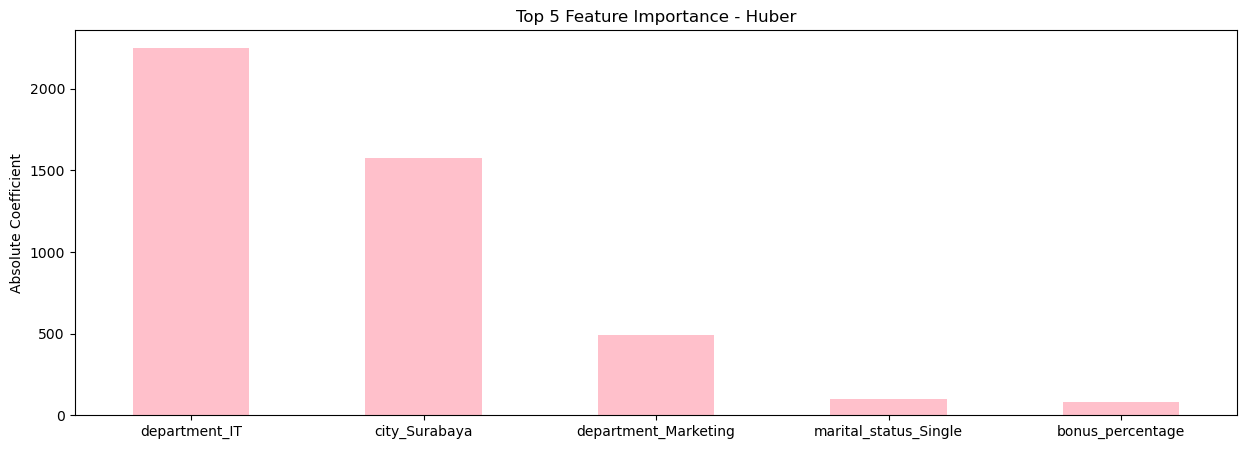

In [47]:
# Feature importance
importance = pd.Series(np.abs(coef), index=feature_names).sort_values(ascending=False)

# Get the top 5 most important features
top5 = importance.head(5)

# Plot the top 5 features
top5.plot(kind='bar', figsize=(15, 5), color='pink')  # Create a bar plot for the top 5 features
plt.title('Top 5 Feature Importance - Huber')  # Set the plot title
plt.ylabel('Absolute Coefficient')  # Label for the y-axis
plt.xticks(rotation=0)  # Rotate the x-axis labels to make them horizontal
plt.show()  # Display the plot

**Insight:**
- department_IT has the highest importance, with a significantly larger coefficient (~2,200). This suggests that the department a person belongs to (specifically IT) has a strong influence on the target variable.
- city_Surabaya comes next, with a moderate coefficient (~1,500). This indicates that the city where an individual resides also plays a significant role in determining the outcome.
- department_Marketing has a smaller coefficient (~500), suggesting it's a relatively weaker predictor compared to the IT department.
- marital_status_Single and bonus_percentage have the lowest importance, with coefficients just above 100. This implies that these features have a minimal impact on the model's predictions.

## Save Model
- The best model (Huber Regressor, after hyperparameter tuning) and the preprocessing pipeline (ColumnTransformer ct) are saved using joblib.
- Saving both the model and preprocessing pipeline ensures that future predictions can be made using the exact same transformations and model settings as the ones used during training.

In [48]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'employee_income_prediction.joblib')

['employee_income_prediction.joblib']

In [51]:
# Save column transformer
joblib.dump(ct, 'preprocessing_pipeline.joblib')

['preprocessing_pipeline.joblib']

## Load Model
The saved model and preprocessing pipeline can be loaded from disk using `joblib.load()`.

In [49]:
# Load the saved model
loaded_model = joblib.load('employee_income_prediction.joblib')

## Testing
- The test data is structured to match the input format that the model expects. It includes features such as gender, marital status, city, and other numerical features like age, years of experience, and performance score.
- An example test data is provided, which includes three records with different employee attributes.

In [50]:
# Example test data based on your dataset structure
test_data = pd.DataFrame([
    {
        'gender': 'Male',
        'marital_status': 'Single',
        'city': 'Bangalore',
        'education_level': 'Bachelors',
        'department': 'IT',
        'income_class': 'High',
        'age': 28,
        'years_experience': 3,
        'weekly_hours': 40,
        'bonus_percentage': 10,
        'performance_score': 4.5,
        'overtime_hours': 5,
        'monthly_income': 60000
    },
    {
        'gender': 'Female',
        'marital_status': 'Married',
        'city': 'Pune',
        'education_level': 'Masters',
        'department': 'HR',
        'income_class': 'Medium',
        'age': 30,
        'years_experience': 5,
        'weekly_hours': 42,
        'bonus_percentage': 15,
        'performance_score': 4.2,
        'overtime_hours': 2,
        'monthly_income': 55000
    },
    {
        'gender': 'Male',
        'marital_status': 'Married',
        'city': 'Mumbai',
        'education_level': 'PhD',
        'department': 'R&D',
        'income_class': 'High',
        'age': 40,
        'years_experience': 10,
        'weekly_hours': 45,
        'bonus_percentage': 20,
        'performance_score': 4.8,
        'overtime_hours': 8,
        'monthly_income': 80000
    }
])

# Display the test data
test_data


,gender,marital_status,city,education_level,department,income_class,age,years_experience,weekly_hours,bonus_percentage,performance_score,overtime_hours,monthly_income
0,Male,Single,Bangalore,Bachelors,IT,High,28,3,40,10,4.5,5,60000
1,Female,Married,Pune,Masters,HR,Medium,30,5,42,15,4.2,2,55000
2,Male,Married,Mumbai,PhD,R&D,High,40,10,45,20,4.8,8,80000
